In [7]:
import numpy as np
import pandas as pd
data = pd.read_csv('test_dataset.csv')
AQI = data.iloc[:, 10].values # used to be 7


# indexes = [2, 3, 5]
# for index in sorted(indexes, reverse=True):
#     del my_list[index]
print(type(AQI))
print(len(AQI))

AQI = AQI.tolist()

idx_l = []
for i in range(len(AQI)):
    if AQI[i] < 0:
        idx_l.append(i)
        
for index in sorted(idx_l, reverse=True):
    del AQI[index]

print(len(AQI))
AQI = np.array(AQI)

        

<class 'numpy.ndarray'>
8736
8691


In [8]:
# displaying selected columns
print()
# displaying a single column (Population)
# print(AQI)
print(AQI[len(AQI)//2: (len(AQI)//2) + 3])


[29. 28. 21.]


In [9]:
import numpy as np

def average_adiag(x):
    """Average antidiagonal elements of a 2d array
    Parameters:
    -----------
    x : np.array
        2d numpy array of size

    Return:
    -------
    x1d : np.array
        1d numpy array representing averaged antediangonal elements of x

    """
    x1d = [np.mean(x[::-1, :].diagonal(i)) for i in
           range(-x.shape[0] + 1, x.shape[1])]
    return np.array(x1d)
    
# x = np.arange(12).reshape(4,3)
# print(x)
load_np_24 = np.load('BiLSTM_average_pred.npy')
new_np_24 = average_adiag(load_np_24)
load_np_6 = np.load('BiLSTM_average_pred_48_6.npy')
new_np_6 = average_adiag(load_np_6)

new_np_24 = new_np_24.tolist()
new_np_6 = new_np_6.tolist()

for index in sorted(idx_l, reverse=True):
    del new_np_24[index]
    
for index in sorted(idx_l, reverse=True):
    del new_np_6[index]
    
new_np_24 = np.array(new_np_24)
new_np_6 = np.array(new_np_6)


print(new_np_6)


print(new_np_24[len(new_np_24)//2: (len(new_np_24)//2) + 3])
print(new_np_6[len(new_np_6)//2: (len(new_np_6)//2) + 3])
# print(new_np)# Online Python compiler (interpreter) to run Python online.
# Write Python 3 code in this online editor and run it.

[189.15748469 191.21880595 186.8108955  ...  34.34652225  40.10051409
  40.6725893 ]
[54.01832638 52.49618942 51.50763278]
[42.56709118 39.551582   37.21922514]


In [10]:
len(AQI)

8691

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

for i in range(len(AQI)):
    if AQI[i] < 0:
        np.delete(AQI, i)
        np.delete(new_np_24, i)
        np.delete(new_np_6, i)


print("Bi-LSTM - 24 hour")
print("MAE: " , (mean_absolute_error(AQI, new_np_24)))
print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_24))))
print("R2: " , (r2_score(AQI, new_np_24)))

print("Bi-LSTM - 6 hour")
print("MAE: " , (mean_absolute_error(AQI, new_np_6)))
print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_6))))
print("R2: " , (r2_score(AQI, new_np_6)))

Bi-LSTM - 24 hour
MAE:  36.53230085123063
RMSE:  56.68959961896393
R2:  0.5696859517997335
Bi-LSTM - 6 hour
MAE:  22.53364063377112
RMSE:  38.83014224948092
R2:  0.7981091167175864


In [71]:
for i in range(len(AQI)):
    if AQI[i] < 0:
        np.delete(AQI, i)
        np.delete(new_np_trans, i)

print("BiLSTM - 24 hours")
print("MAE: " , (mean_absolute_error(AQI, new_np_trans)))
print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_trans))))
print("R2: " , (r2_score(AQI, new_np_trans)))

Transformers
MAE:  22.63545595457463
RMSE:  39.12899863505062
R2:  0.794989449069026


In [72]:
for i in range(len(AQI)):
    if AQI[i] < 0:
        np.delete(AQI, i)
        np.delete(new_np_lstm, i)

print("BiLSTM - 6 hours")
print("MAE: " , (mean_absolute_error(AQI, new_np_lstm)))
print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_lstm))))
print("R2: " , (r2_score(AQI, new_np_lstm)))

LSTM
MAE:  37.167811249609386
RMSE:  56.28424373814265
R2:  0.5758178244515052


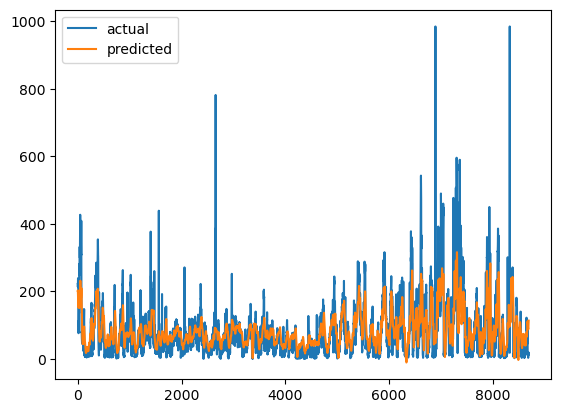

In [73]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_lstm, label='predicted')
plt.legend()
plt.show()


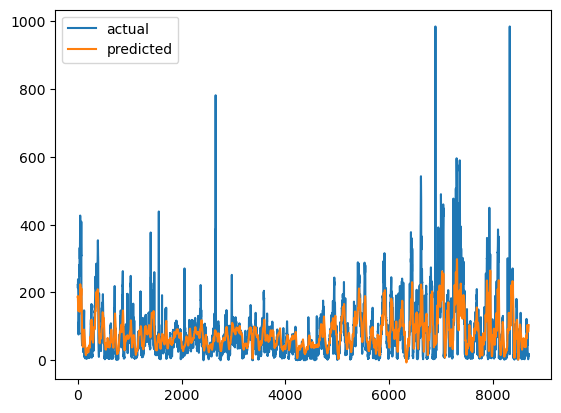

In [74]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_bilstm, label='predicted')
plt.legend()
plt.show()

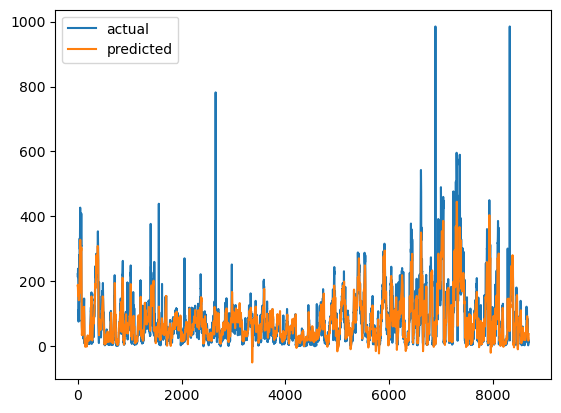

In [75]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_trans, label='predicted')
plt.legend()
plt.show()

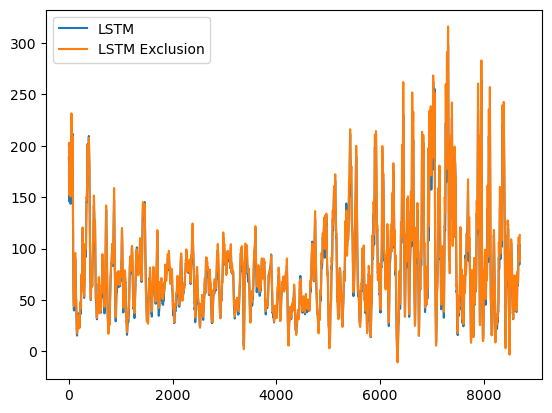

In [77]:
import matplotlib.pyplot as plt

plt.plot(new_np_bilstm, label='LSTM')
plt.plot(new_np_lstm, label='LSTM Exclusion')
plt.legend()
plt.show()